In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
sns.set(style="whitegrid", palette="muted", color_codes=True)


In [3]:
# ====================================================
# 1. Data Loading and Initial Inspection
# ====================================================

# Load the Titanic dataset from Seaborn
df = sns.load_dataset('titanic')

# Print the first few rows of the dataset
print("----- Dataset Head -----")
print(df.head())

# Display information about the dataset (columns, data types, missing values)
print("\n----- Dataset Info -----")
print(df.info())

# Show summary statistics for both numerical and categorical features
print("\n----- Summary Statistics -----")
print(df.describe(include='all'))

----- Dataset Head -----
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

----- Dataset Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --

In [4]:
# ====================================================
# 2. Data Cleaning
# ====================================================

# ----- Handling Missing Values -----
print("\n----- Missing Values Before Cleaning -----")
print(df.isnull().sum())


----- Missing Values Before Cleaning -----
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [5]:
# Impute missing numerical values:
# For 'age', fill missing values with the median.
df['age'].fillna(df['age'].median(), inplace=True)

# For 'fare', fill missing values with the median (if any exist)
if df['fare'].isnull().sum() > 0:
    df['fare'].fillna(df['fare'].median(), inplace=True)

# Impute missing categorical values:
# For 'embarked', fill missing values with the mode.
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# For 'deck', we need to add the new category "Unknown" if the column is categorical.
if pd.api.types.is_categorical_dtype(df['deck']):
    df['deck'] = df['deck'].cat.add_categories("Unknown")
df['deck'].fillna("Unknown", inplace=True)

In [6]:
print("\n----- Missing Values After Imputation -----")
print(df.isnull().sum())



----- Missing Values After Imputation -----
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64


In [7]:
num_duplicates = df.duplicated().sum()
print("\nNumber of duplicate records before removal:", num_duplicates)
df.drop_duplicates(inplace=True)
print("Number of records after duplicate removal:", df.shape[0])


Number of duplicate records before removal: 110
Number of records after duplicate removal: 781


In [8]:
# ----- Outlier Detection and Treatment -----
# We'll use the IQR method for 'age' and 'fare' to detect and remove outliers.
def remove_outliers_iqr(dataframe, column):
    """
    Remove outliers from a dataframe column using the IQR method.
    """
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

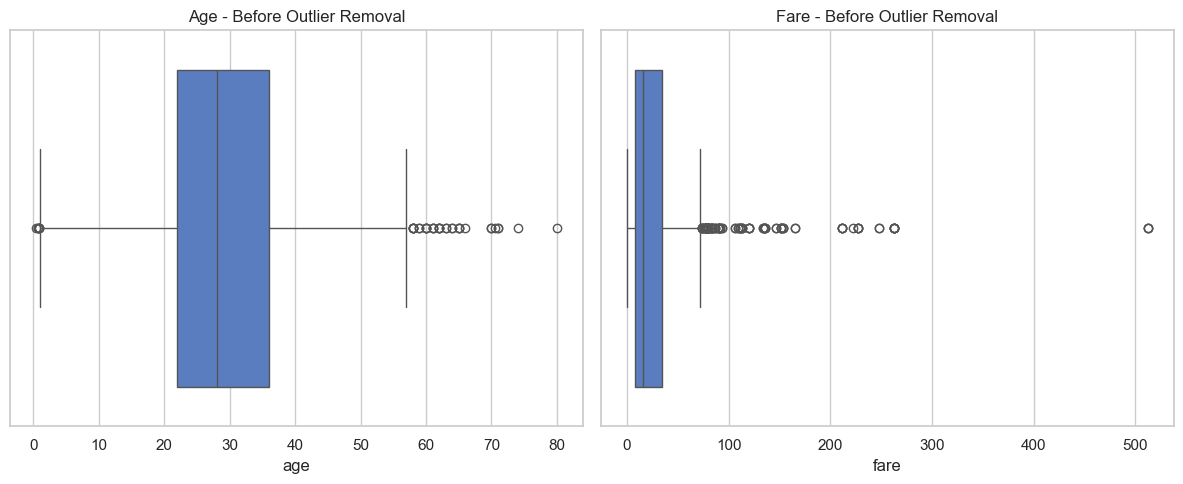

In [9]:
# Visualize boxplots before outlier removal for 'age' and 'fare'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['age'])
plt.title("Age - Before Outlier Removal")
plt.subplot(1, 2, 2)
sns.boxplot(x=df['fare'])
plt.title("Fare - Before Outlier Removal")
plt.tight_layout()
plt.show()

In [10]:
# Remove outliers for 'age' and 'fare'
df_clean = remove_outliers_iqr(df, 'age')
df_clean = remove_outliers_iqr(df_clean, 'fare')
print("\nDataset shape after outlier removal:", df_clean.shape)

# ----- Standardizing Categorical Variables -----
# Convert string columns to a consistent case.
df_clean['sex'] = df_clean['sex'].str.lower()
df_clean['embarked'] = df_clean['embarked'].str.upper()
df_clean['class'] = df_clean['class'].str.title()


Dataset shape after outlier removal: (644, 15)


In [11]:
# ====================================================
# 3. Exploratory Data Analysis (EDA)
# ====================================================

# -----------------------------
# Univariate Analysis
# -----------------------------

# Summary statistics for numerical variables
print("\n----- Numerical Variables Summary -----")
print(df_clean.describe())

# Frequency counts for categorical variables
print("\n----- Frequency Distribution for 'sex' -----")
print(df_clean['sex'].value_counts())
print("\n----- Frequency Distribution for 'embarked' -----")
print(df_clean['embarked'].value_counts())


----- Numerical Variables Summary -----
         survived      pclass         age       sibsp       parch        fare
count  644.000000  644.000000  644.000000  644.000000  644.000000  644.000000
mean     0.368012    2.453416   27.823758    0.496894    0.391304   18.878494
std      0.482640    0.747835   11.689094    0.950562    0.841563   14.056192
min      0.000000    1.000000    1.000000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   21.000000    0.000000    0.000000    7.895800
50%      0.000000    3.000000   28.000000    0.000000    0.000000   13.000000
75%      1.000000    3.000000   34.000000    1.000000    0.000000   26.250000
max      1.000000    3.000000   57.000000    5.000000    6.000000   66.600000

----- Frequency Distribution for 'sex' -----
sex
male      420
female    224
Name: count, dtype: int64

----- Frequency Distribution for 'embarked' -----
embarked
S    491
C     98
Q     55
Name: count, dtype: int64


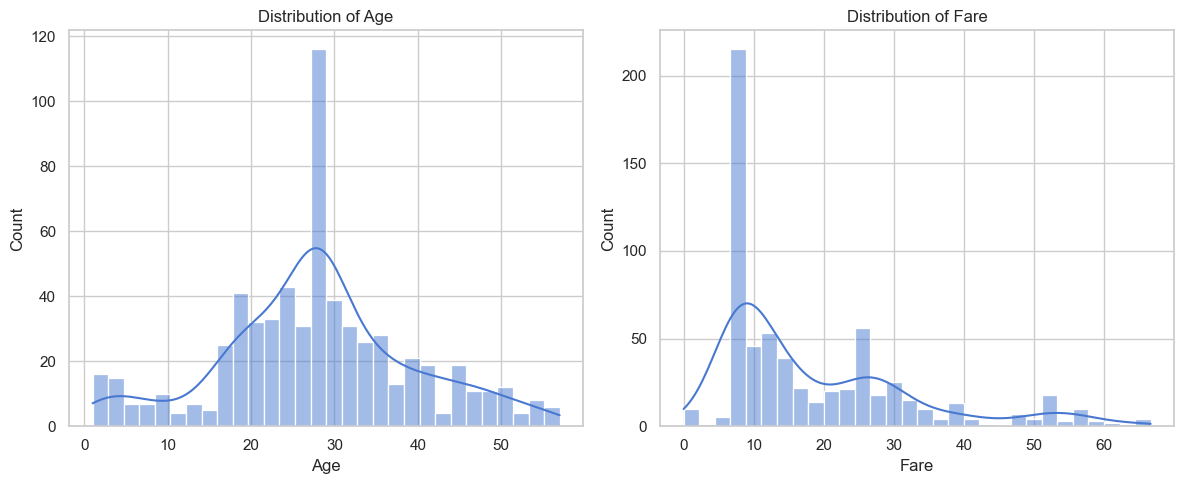

In [12]:
# Histograms for continuous variables: Age and Fare
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_clean['age'], bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.subplot(1, 2, 2)
sns.histplot(df_clean['fare'], bins=30, kde=True)
plt.title("Distribution of Fare")
plt.xlabel("Fare")
plt.tight_layout()
plt.show()

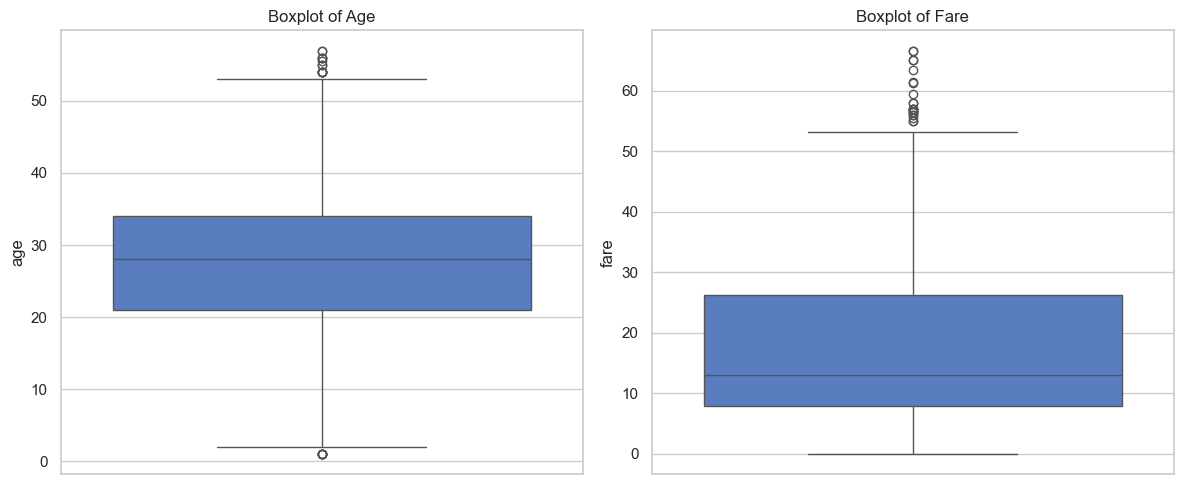

In [13]:
# Box plots for continuous variables to identify distribution and any remaining outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df_clean['age'])
plt.title("Boxplot of Age")
plt.subplot(1, 2, 2)
sns.boxplot(y=df_clean['fare'])
plt.title("Boxplot of Fare")
plt.tight_layout()
plt.show()

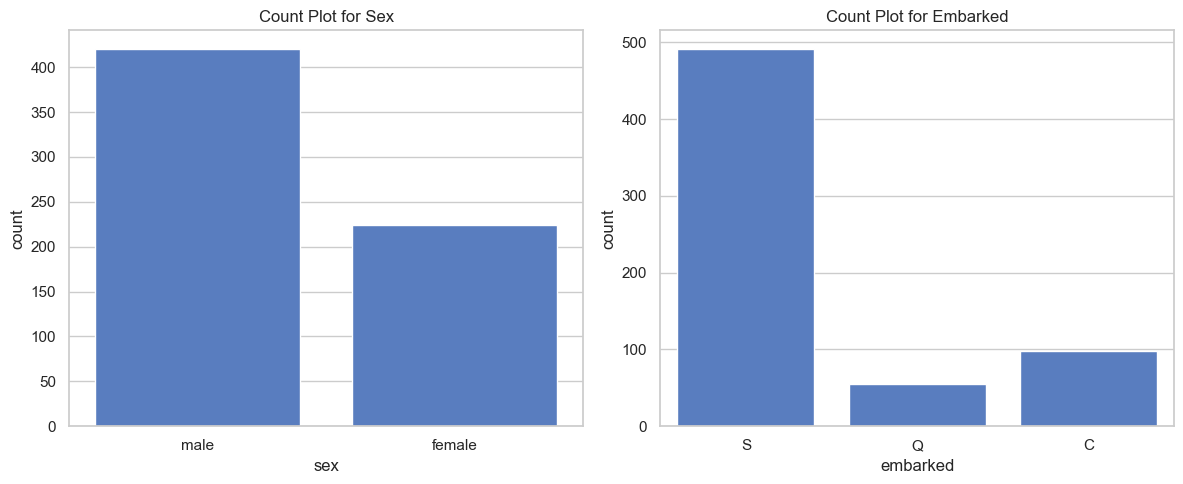

In [14]:
# Count plots for categorical variables
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=df_clean['sex'])
plt.title("Count Plot for Sex")
plt.subplot(1, 2, 2)
sns.countplot(x=df_clean['embarked'])
plt.title("Count Plot for Embarked")
plt.tight_layout()

plt.show()

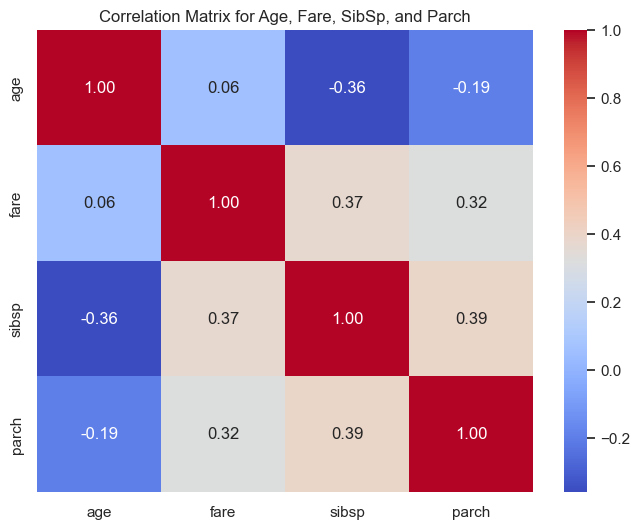

In [15]:
# -----------------------------
# Bivariate Analysis
# -----------------------------

# Correlation matrix for selected numerical variables
corr_matrix = df_clean[['age', 'fare', 'sibsp', 'parch']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Age, Fare, SibSp, and Parch")
plt.show()

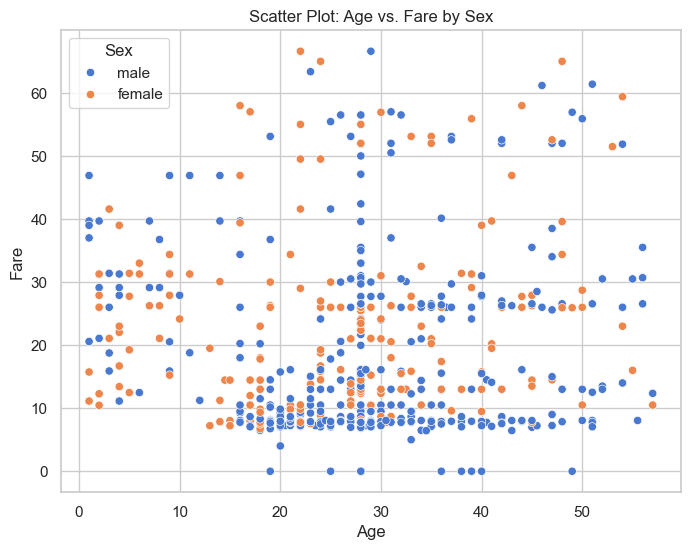

In [16]:
# Scatter plot to explore relationship between 'age' and 'fare', colored by 'sex'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='fare', hue='sex', data=df_clean)
plt.title("Scatter Plot: Age vs. Fare by Sex")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Sex")
plt.show()

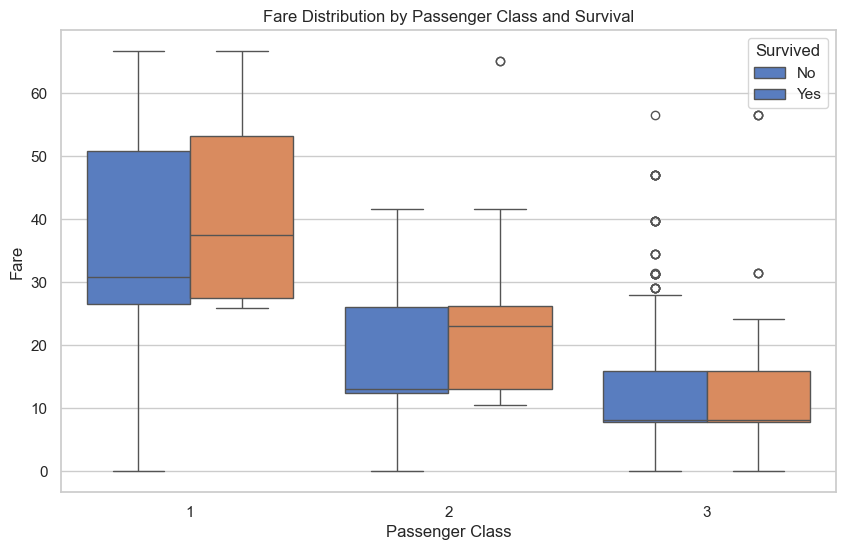

In [17]:
# Box plot: Compare fare distribution across passenger classes (pclass) and survival status
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='fare', hue='survived', data=df_clean)
plt.title("Fare Distribution by Passenger Class and Survival")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.legend(title="Survived", labels=['No', 'Yes'])
plt.show()

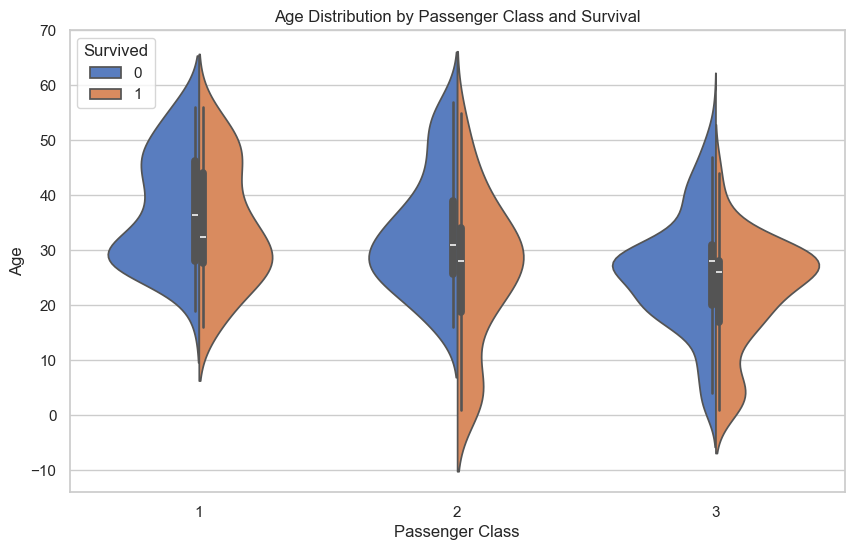

In [18]:
# Violin plot: Distribution of age by passenger class, split by survival status
plt.figure(figsize=(10, 6))
sns.violinplot(x='pclass', y='age', hue='survived', data=df_clean, split=True)
plt.title("Age Distribution by Passenger Class and Survival")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.legend(title="Survived", loc='upper left')
plt.show()


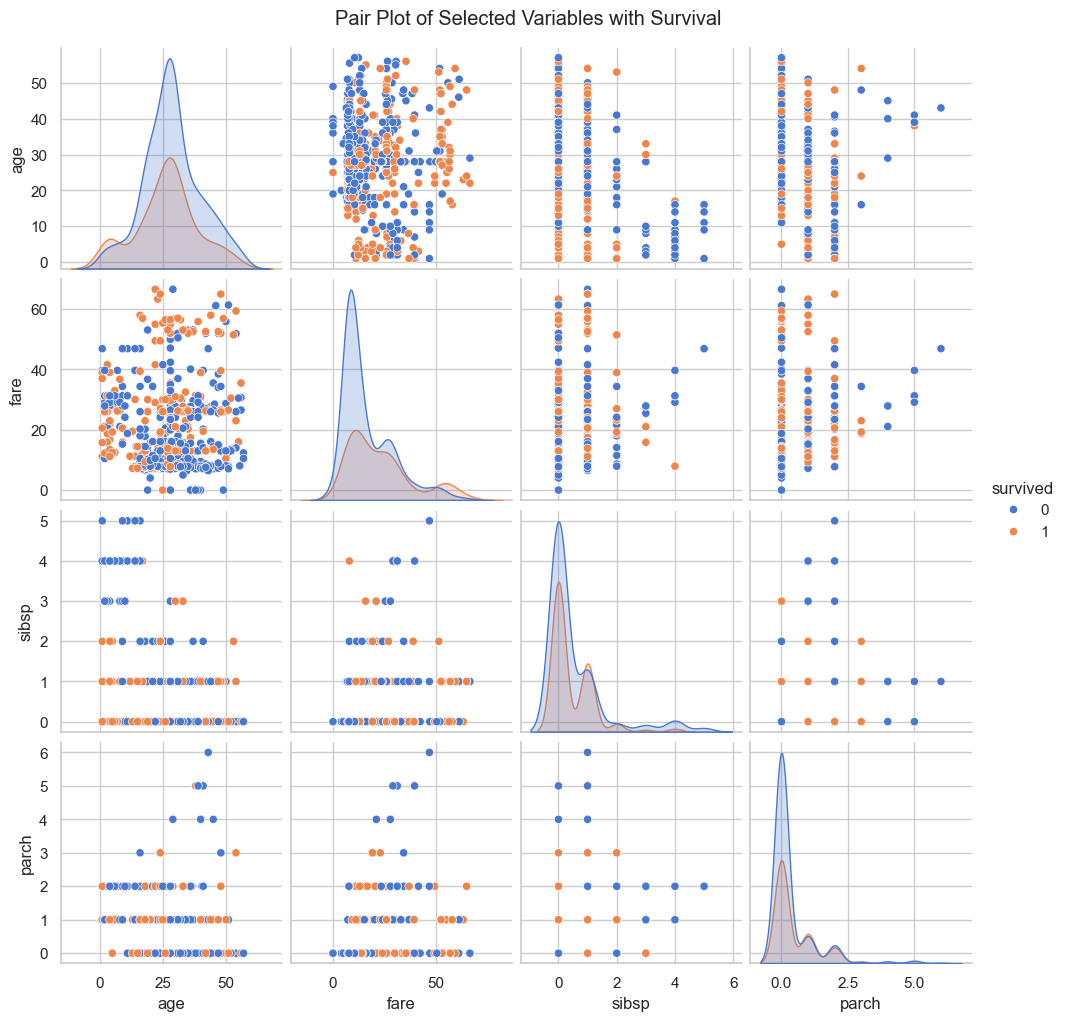

In [19]:
# -----------------------------
# Multivariate Analysis
# -----------------------------

# Pair plot with hue (e.g., 'survived') to visualize relationships among multiple variables
sns.pairplot(df_clean[['age', 'fare', 'sibsp', 'parch', 'survived']], hue='survived')
plt.suptitle("Pair Plot of Selected Variables with Survival", y=1.02)
plt.show()

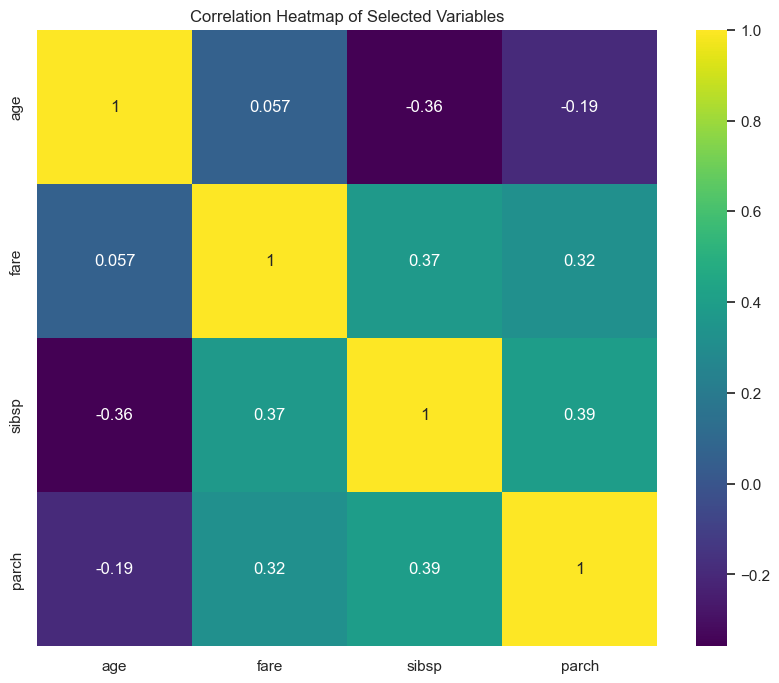

In [20]:
# Heatmap for a larger subset of numerical features to observe correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean[['age', 'fare', 'sibsp', 'parch']].corr(), annot=True, cmap="viridis")
plt.title("Correlation Heatmap of Selected Variables")
plt.show()


In [21]:
# Grouped analysis: Average fare by sex and passenger class
grouped_fare = df_clean.groupby(['sex', 'pclass'])['fare'].mean().reset_index()
print("\n----- Average Fare by Sex and Passenger Class -----")
print(grouped_fare)


----- Average Fare by Sex and Passenger Class -----
      sex  pclass       fare
0  female       1  46.720841
1  female       2  22.194921
2  female       3  15.290425
3    male       1  35.117008
4    male       2  18.593196
5    male       3  12.491199


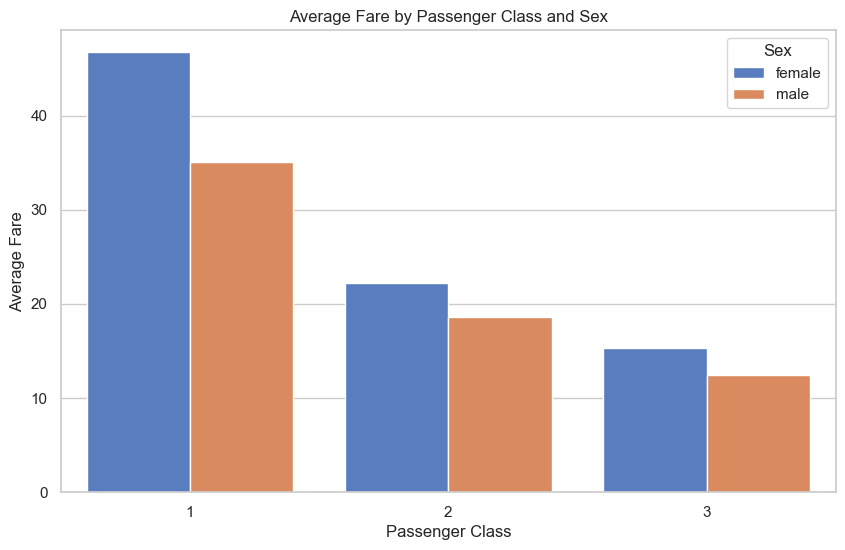

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='fare', hue='sex', data=grouped_fare)
plt.title("Average Fare by Passenger Class and Sex")
plt.xlabel("Passenger Class")
plt.ylabel("Average Fare")
plt.legend(title="Sex")
plt.show()


----- Survival Rate by Passenger Class -----
   pclass  survived
0       1  0.560000
1       2  0.526316
2       3  0.257653


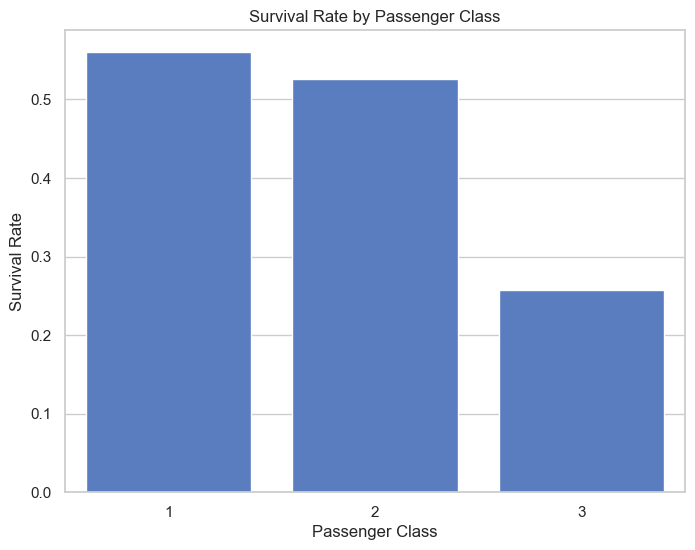

In [23]:
# Additional Analysis: Survival Analysis
# Survival rate by passenger class
survival_by_class = df_clean.groupby('pclass')['survived'].mean().reset_index()
print("\n----- Survival Rate by Passenger Class -----")
print(survival_by_class)

plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='survived', data=survival_by_class)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()



----- Survival Rate by Embarked Location -----
  embarked  survived
0        C  0.489796
1        Q  0.345455
2        S  0.346232


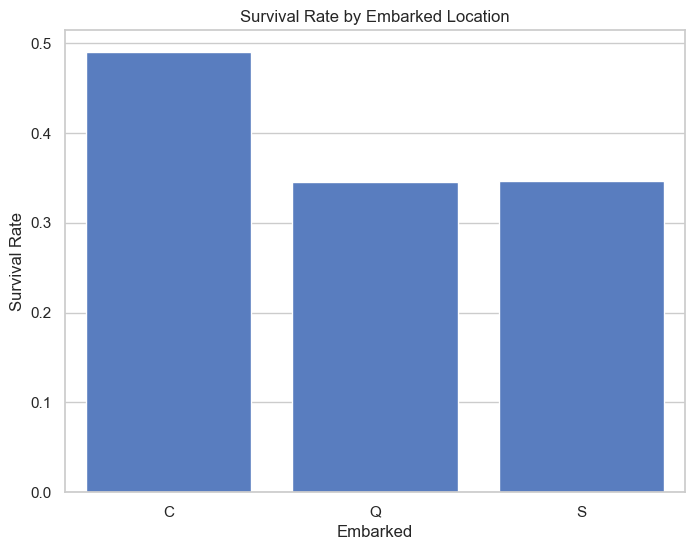

In [24]:
# Survival rate by embarked location
survival_by_embarked = df_clean.groupby('embarked')['survived'].mean().reset_index()
print("\n----- Survival Rate by Embarked Location -----")
print(survival_by_embarked)

plt.figure(figsize=(8, 6))
sns.barplot(x='embarked', y='survived', data=survival_by_embarked)
plt.title("Survival Rate by Embarked Location")
plt.xlabel("Embarked")
plt.ylabel("Survival Rate")
plt.show()

In [25]:
# Pivot table: Survival rate by sex and passenger class
pivot_survival = pd.pivot_table(df_clean, values='survived', index='sex', columns='pclass', aggfunc=np.mean)
print("\n----- Pivot Table: Survival Rate by Sex and Passenger Class -----")
print(pivot_survival)


----- Pivot Table: Survival Rate by Sex and Passenger Class -----
pclass         1         2         3
sex                                 
female  0.962963  0.917808  0.467742
male    0.410959  0.164557  0.160448


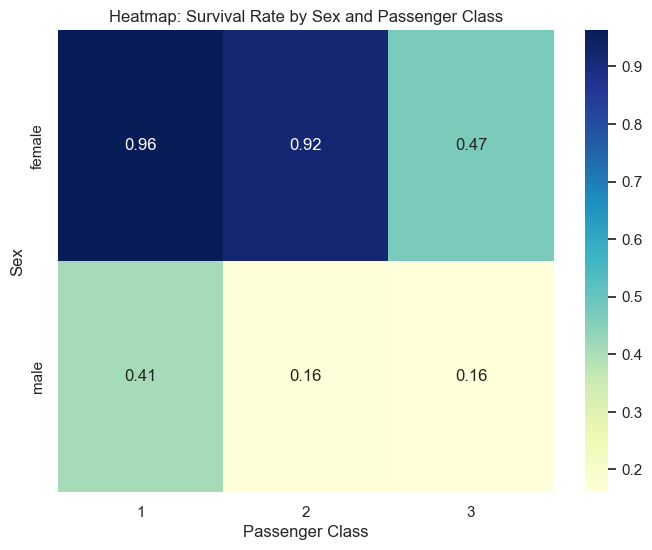

In [26]:
# Heatmap for the pivot table
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_survival, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap: Survival Rate by Sex and Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Sex")
plt.show()


New Feature 'family_size' added. Summary:
count    644.000000
mean       1.888199
std        1.495431
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: family_size, dtype: float64


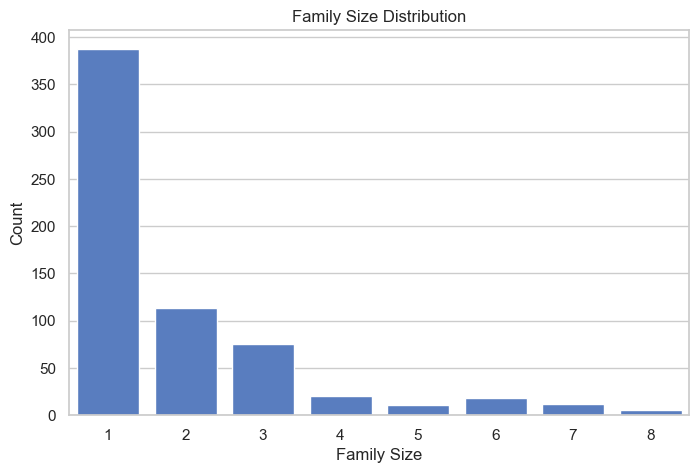

In [27]:
# ====================================================
# 4. Feature Engineering and Modeling Preparation (Optional)
# ====================================================

# Create a new feature 'family_size' by combining 'sibsp' and 'parch'
df_clean['family_size'] = df_clean['sibsp'] + df_clean['parch'] + 1  # including self
print("\nNew Feature 'family_size' added. Summary:")
print(df_clean['family_size'].describe())

# Visualize the distribution of family_size
plt.figure(figsize=(8, 5))
sns.countplot(x='family_size', data=df_clean)
plt.title("Family Size Distribution")
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.show()


In [28]:
# ====================================================
# 5. Save the Cleaned and Enhanced Dataset (Optional)
# ====================================================
df_clean.to_csv("titanic_cleaned_enhanced.csv", index=False)
print("\nCleaned and enhanced dataset saved as 'titanic_cleaned_enhanced.csv'")


Cleaned and enhanced dataset saved as 'titanic_cleaned_enhanced.csv'
